In [1]:
import pandas as pd
from datetime import datetime

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

#### Load the dataset
- The dataset used in this project is Online Retail II Data Set from UCI.
- Source: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II
- The dataset downloaded from this link is an .xlsx file which contains 2 sheets separate the information of the firm in year 2009-2010 and 2010-2011.

#### It's a good practice that we should define column types before use pd.read_excel()

In [4]:
col_types = {"Invoice": str,
             "StockCode": str,
             "Description": str,
             "Quantity": int,
             "InvoiceDate": datetime,
             "Price": float,
             "Customer ID": str,
             "Country": str
            }

In [5]:
sheet1 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2009-2010", dtype=col_types)

In [6]:
sheet2 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011", dtype=col_types)

- Lets take a look at the data we have

In [7]:
sheet1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [8]:
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int32         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  object        
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 30.1+ MB


In [9]:
sheet2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [10]:
sheet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int32         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  object        
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 31.0+ MB


#### So the dataset contains information for 8 fields:
- Invoice number
- Stock code of the product
- Description of the product
- Quantity of the product
- Invoice date
- Price (per unit) of product
- Customer ID
- Country of the customer

#### We should concatnate these 2 sheet into 1 dataframe

In [11]:
df = pd.concat([sheet1, sheet2], ignore_index=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int32         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   object        
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 61.1+ MB


In [13]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


#### Create derived columns
- missing_cust_id: show if the row is missing customer id or not. True: missing.
- cancelled: show if the order in the row is cancelled or not. True: cancelled
- invoice_date: show to date of invoice but not timestamp

In [14]:
df["missing_cust_id"] = df["Customer ID"].isna()
df["cancalled"] = df["Invoice"].str.contains("C")
df["invoice_date"] = df["InvoiceDate"].dt.date
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,False,False,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,False,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,False,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,False,False,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,False,False,2009-12-01
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,False,False,2011-12-09
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,False,False,2011-12-09
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,False,False,2011-12-09
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,False,False,2011-12-09


#### Check for missing values

In [15]:
series = df.isna().sum()/len(df)
df_missing = series.reset_index()
df_missing.columns = ["Column name", "Proportion of missing cell"]
df_missing

,Column name,Proportion of missing cell
0,Invoice,0.000000
1,StockCode,0.000000
2,Description,0.004105
3,Quantity,0.000000
4,InvoiceDate,0.000000
5,Price,0.000000
6,Customer ID,0.227669
7,Country,0.000000
8,missing_cust_id,0.000000
9,cancalled,0.000000


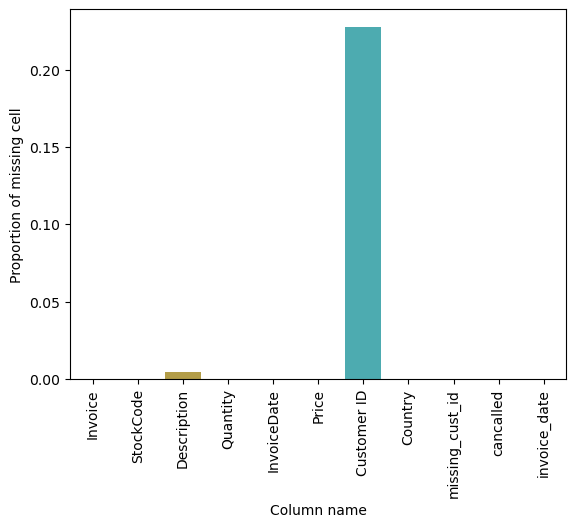

In [16]:
# Plot the missing value information
_, ax01 = plt.subplots()

sns.barplot(data=df_missing, x=df_missing['Column name'], y=df_missing['Proportion of missing cell'], ax=ax01)
ax01.set_xticklabels(ax01.get_xticklabels(), rotation=90)

plt.show()

- There are 22.8% missing values in customer id and 0.4% missing values in description.

#### Inspect High-level-count Categorical Variables

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Invoice          1067371 non-null  object        
 1   StockCode        1067371 non-null  object        
 2   Description      1062989 non-null  object        
 3   Quantity         1067371 non-null  int32         
 4   InvoiceDate      1067371 non-null  datetime64[ns]
 5   Price            1067371 non-null  float64       
 6   Customer ID      824364 non-null   object        
 7   Country          1067371 non-null  object        
 8   missing_cust_id  1067371 non-null  bool          
 9   cancalled        1067371 non-null  bool          
 10  invoice_date     1067371 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(1), int32(1), object(6)
memory usage: 71.3+ MB


In [18]:
df[['Invoice','StockCode','Description','Customer ID','Country']].nunique()

Invoice        53628
StockCode       5305
Description     5698
Customer ID     5942
Country           43
dtype: int64

- Our dataset has 1067371 rows contain information of:
    - 53628 invoices
    - 5305 stockcodes (products)
    - 5942 customers
    - 43 countries

#### Lets take a closer to into each column

In [19]:
df['Invoice'].value_counts()

537434     1350
538071     1304
537638     1202
537237     1194
536876     1186
           ... 
C518262       1
548515        1
C548513       1
C524395       1
559376        1
Name: Invoice, Length: 53628, dtype: int64

In [20]:
df[df['Invoice'] == '537434'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
516208,537434,20685,DOORMAT RED RETROSPOT,1,2010-12-06 16:57:00,14.43,NaN,United Kingdom,True,False,2010-12-06
516209,537434,20699,MOUSEY LONG LEGS SOFT TOY,1,2010-12-06 16:57:00,5.06,NaN,United Kingdom,True,False,2010-12-06
516210,537434,20713,JUMBO BAG OWLS,1,2010-12-06 16:57:00,4.21,NaN,United Kingdom,True,False,2010-12-06
516211,537434,20719,WOODLAND CHARLOTTE BAG,3,2010-12-06 16:57:00,1.66,NaN,United Kingdom,True,False,2010-12-06
516212,537434,20725,LUNCH BAG RED RETROSPOT,4,2010-12-06 16:57:00,4.21,NaN,United Kingdom,True,False,2010-12-06


In [21]:
df[df['Invoice'] == '559376'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
781363,559376,48116,NaN,-35,2011-07-08 10:38:00,0.0,NaN,United Kingdom,True,False,2011-07-08


In [22]:
df[df['Invoice'] == 'C524395'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
361747,C524395,21815,STAR T-LIGHT HOLDER,-1,2010-09-28 18:34:00,1.45,13701,United Kingdom,False,True,2010-09-28


In [23]:
df[df['cancalled'] == True].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia,False,True,2009-12-01
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia,False,True,2009-12-01
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia,False,True,2009-12-01
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia,False,True,2009-12-01
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia,False,True,2009-12-01


#### Some information we can see from these inspections:
- 1 invoice may have multiple rows, each row shows the information of products in the order.
- Cancelled invoice should have quantity < 0.
- There is a data issue here that some invoice which is not cancelled have quantity < 0 (invoice 559376)

### Check for data integrity

#### The letter in invoice contains a lot of information, we check for this first

In [24]:
df['Invoice'].str[0].value_counts()

5    939382
4    108489
C     19494
A         6
Name: Invoice, dtype: int64

- C denotes that the records is cancelled order, now we have to see what A is about

In [25]:
df[df['Invoice'].str.contains('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom,True,False,2010-04-29
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom,True,False,2010-07-19
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom,True,False,2010-10-20
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,True,False,2011-08-12
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,True,False,2011-08-12
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,True,False,2011-08-12


- Here we can see that A denotes records that adjusting debt
- For the purpose of customer analysis, we do not need these kind of records

In [26]:
# Drop records that have Invoice code start with A
df = df[~df['Invoice'].str.contains('A')]

- For orders that be cancelled, there are orders that before appear in the dataset. I will delete these 'before appear' orders for not misleading later.

In [27]:
cancelled_orders = df[df['Invoice'].str.contains('C')]['Invoice'].str.slice(1).unique()
mask = df['Invoice'].isin(cancelled_orders)
df = df[~mask]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,False,False,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,False,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,False,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,False,False,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,False,False,2009-12-01
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,False,False,2011-12-09
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,False,False,2011-12-09
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,False,False,2011-12-09
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,False,False,2011-12-09


#### Lets check for records that do not have customer id

In [28]:
df[df['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom,True,False,2009-12-01
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom,True,False,2009-12-01
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom,True,False,2009-12-01
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom,True,False,2009-12-01
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom,True,False,2009-12-01
...,...,...,...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,True,False,2011-12-09
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,True,False,2011-12-09
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,True,False,2011-12-09
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,True,False,2011-12-09


- We should drop these records because this scope of analysis is to analyze customer

In [29]:
df = df[~df['Customer ID'].isna()]

## Univariate Data Exploration

### Logical variables

In [30]:
def plot_count_bar_logvar(series):
    """
    This function plot the bar plot for logical column.
    """
    cseries = series.value_counts()
    c_df = cseries.reset_index()
    c_df.columns = [series.name,'Count']
    ax = sns.barplot(x=c_df[series.name], y=c_df['Count'])
    # ax.set_title(series.name)
    plt.show()

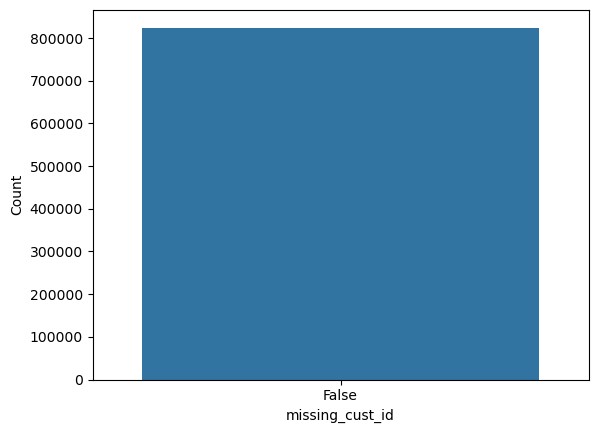

In [31]:
# Check for the customer id missing
plot_count_bar_logvar(df['missing_cust_id'])

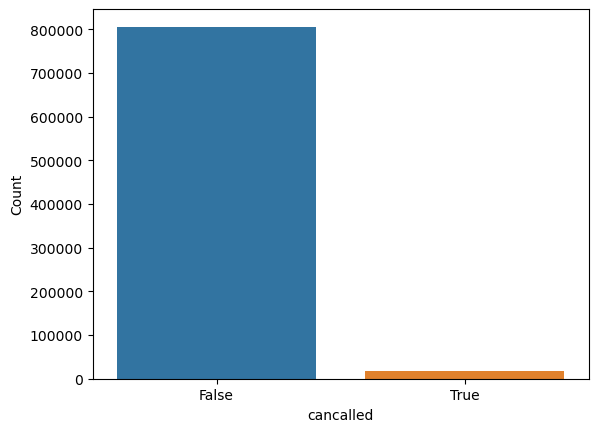

In [32]:
# Check for the cancelled orders
plot_count_bar_logvar(df['cancalled'])

### Numeric variables

#### Quantity

In [33]:
df['Quantity'].describe()

count    824364.000000
mean         12.414574
std         188.976099
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

CPU times: total: 62.5 ms
Wall time: 76 ms


<Axes: >

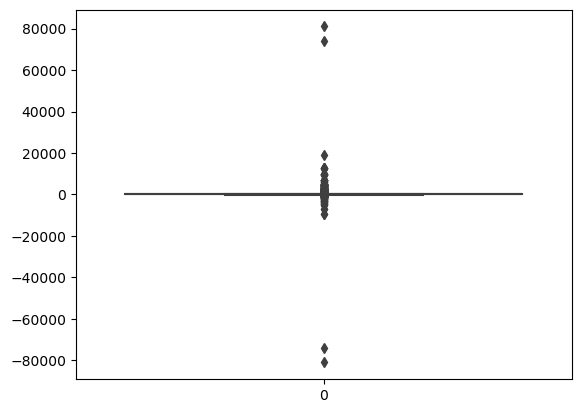

In [34]:
%%time
sns.boxplot(data=df['Quantity'])

#### From this boxplot we can see:
- A lot of quantity are negative, this should be due to cancelled orders.
- There are 4 extreme values symmetric with 0 line, it seems these are orders and cancelled orders respectively.

In [35]:
df[df['Quantity'] > 60000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,False,False,2011-01-18
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,False,False,2011-12-09


In [36]:
df[df['Quantity'] < -60000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,False,True,2011-01-18
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,False,True,2011-12-09


#### Lets check if all records have quantity < 0 belong to cancelled orders or not

In [37]:
df[df['Quantity'] < 0]['cancalled'].value_counts()

True    18744
Name: cancalled, dtype: int64

#### Now lets check the distribution of quantity again

CPU times: total: 31.2 ms
Wall time: 48 ms


<Axes: >

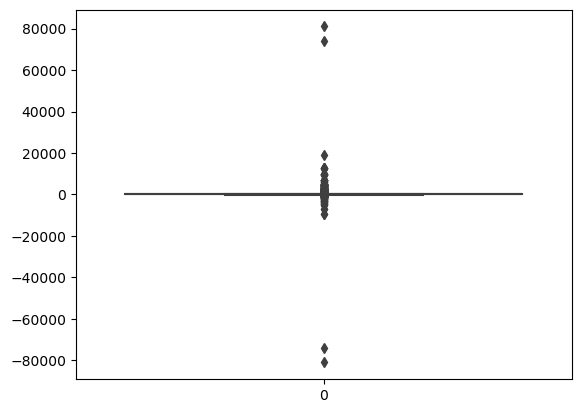

In [38]:
%%time
sns.boxplot(data=df['Quantity'])

<Axes: xlabel='Quantity', ylabel='Count'>

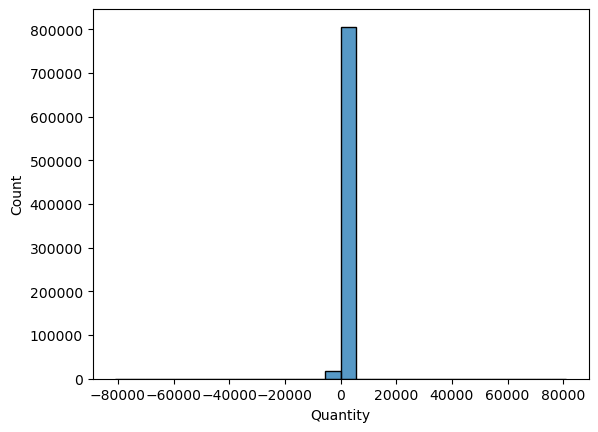

In [39]:
sns.histplot(data=df['Quantity'], bins=30)

c:\Users\nguye\miniconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Quantity', ylabel='Count'>

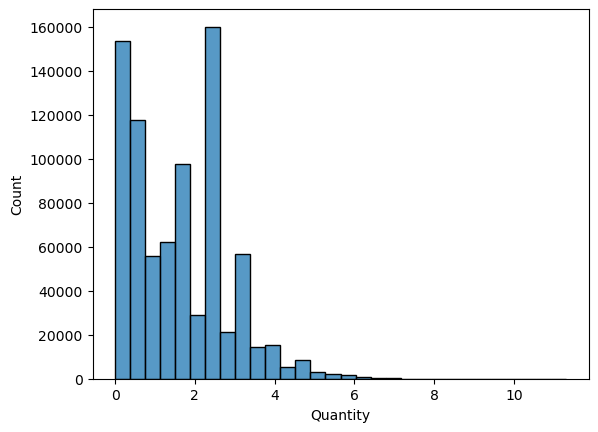

In [40]:
sns.histplot(data=np.log(df['Quantity']), bins=30)

In [41]:
df[df['Quantity'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia,False,True,2009-12-01
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia,False,True,2009-12-01
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia,False,True,2009-12-01
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia,False,True,2009-12-01
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia,False,True,2009-12-01
...,...,...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,False,True,2011-12-09
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,False,True,2011-12-09
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,False,True,2011-12-09
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,False,True,2011-12-09


In [42]:
df.sort_values(by=['Quantity'], ascending=False)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,False,False,2011-12-09
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,False,False,2011-01-18
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902,Denmark,False,False,2010-02-15
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902,Denmark,False,False,2010-03-17
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902,Denmark,False,False,2010-03-17
...,...,...,...,...,...,...,...,...,...,...,...
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277,France,False,True,2010-09-28
529729,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom,False,True,2010-12-02
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom,False,True,2010-12-02
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,False,True,2011-01-18


#### Price

In [43]:
df['Price'].describe()

count    824364.000000
mean          3.676800
std          70.241388
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: Price, dtype: float64

- There are a lot of records have price = 0. Lets take a look at this

In [44]:
df[df['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126,United Kingdom,False,False,2009-12-02
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658,United Kingdom,False,False,2009-12-03
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231,United Kingdom,False,False,2009-12-07
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108,United Kingdom,False,False,2009-12-08
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108,United Kingdom,False,False,2009-12-08
...,...,...,...,...,...,...,...,...,...,...,...
1004540,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,15602,United Kingdom,False,False,2011-11-17
1005014,577168,M,Manual,1,2011-11-18 10:42:00,0.0,12603,Germany,False,False,2011-11-18
1006110,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,12444,Norway,False,False,2011-11-18
1011446,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406,United Kingdom,False,False,2011-11-21


- These records are not for products that the firm is selling, we should remove them

In [45]:
df = df[df['Price'] > 0]

In [46]:
df['Price'].describe()

count    824293.000000
mean          3.677116
std          70.244404
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: Price, dtype: float64

- Lets take a look at records have price == 0.001

In [47]:
df[df['Price'] == 0.001]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705,United Kingdom,False,False,2010-01-19
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583,United Kingdom,False,False,2010-01-29
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350,United Kingdom,False,False,2010-02-01
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408,United Kingdom,False,False,2010-02-03
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408,United Kingdom,False,False,2010-02-15
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182,United Kingdom,False,False,2010-02-21
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765,United Kingdom,False,False,2010-02-24
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459,United Kingdom,False,False,2010-02-26
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857,United Kingdom,False,False,2010-03-15
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671,Germany,False,False,2010-04-12


<Axes: xlabel='Price', ylabel='Count'>

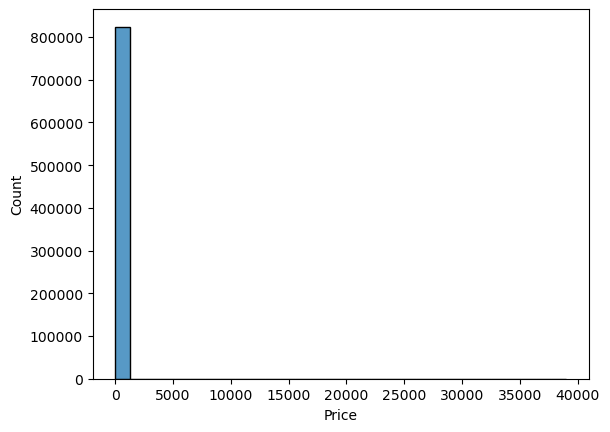

In [48]:
sns.histplot(data=df['Price'], bins=30)

- The distribution of price is highly skewed toward 0, lets try to take a look at log(price)

Text(0.5, 0, 'Log(Price)')

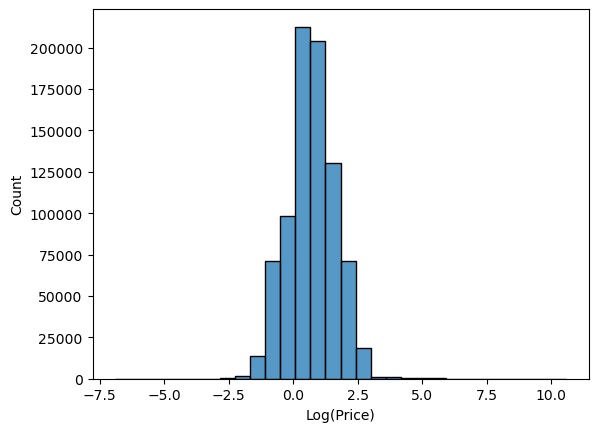

In [49]:
log_price = np.log(df['Price'])
ax = sns.histplot(data=log_price, bins=30)
ax.set_xlabel('Log(Price)')

- Some records have extremely high price, lets take a look

In [50]:
df2 = df.sort_values(['Price'], ascending=False)
df2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
748142,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.000,15098,United Kingdom,False,True,2011-06-10
241824,C512770,M,Manual,-1,2010-06-17 16:52:00,25111.090,17399,United Kingdom,False,True,2010-06-17
135014,C502264,M,Manual,-1,2010-03-23 15:24:00,10953.500,12918,United Kingdom,False,True,2010-03-23
135012,C502262,M,Manual,-1,2010-03-23 15:20:00,10953.500,12918,United Kingdom,False,True,2010-03-23
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.500,12918,United Kingdom,False,False,2010-03-23
...,...,...,...,...,...,...,...,...,...,...,...
468280,533528,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-11-17 15:08:00,0.001,15750,United Kingdom,False,False,2010-11-17
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583,United Kingdom,False,False,2010-01-29
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350,United Kingdom,False,False,2010-02-01
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408,United Kingdom,False,False,2010-02-03


In [51]:
df[df['StockCode'] == 'M']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804,United Kingdom,False,True,2009-12-01
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884,United Kingdom,False,True,2009-12-03
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482,United Kingdom,False,True,2009-12-03
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970,United Kingdom,False,False,2009-12-04
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970,United Kingdom,False,False,2009-12-04
...,...,...,...,...,...,...,...,...,...,...,...
1056893,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841,United Kingdom,False,False,2011-12-06
1058543,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971,United Kingdom,False,True,2011-12-07
1059769,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom,False,True,2011-12-07
1063782,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom,False,False,2011-12-08


#### Categorical Variables

#### Country

In [52]:
def bar_plot_topn_counts(series, n):
    """
    This function plots the top n values that appear most in column
    """
    df_counts = series.value_counts().reset_index()
    df_counts.columns = ['Country','Counts']
    df_counts = df_counts.sort_values(by='Counts', ascending=False).head(n)
    ax = sns.barplot(x=df_counts['Country'], y=df_counts['Counts'])
    plt.xticks(rotation=90)

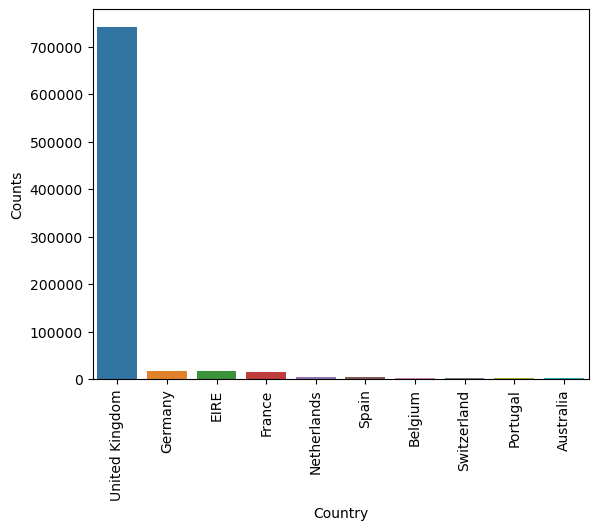

In [53]:
# Top 10 countries that appear most in column Country
bar_plot_topn_counts(df['Country'], 10)

- Most of our orders come from UK

#### Datetime variables

In [54]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,False,False,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,False,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,False,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,False,False,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,False,False,2009-12-01


In [55]:
date_counts = df['invoice_date'].value_counts().reset_index()
date_counts.columns = ['invoice_date','counts']
date_counts.sort_values(by=['invoice_date'], ascending=True)

,invoice_date,counts
53,2009-12-01,2307
54,2009-12-02,2304
46,2009-12-03,2408
96,2009-12-04,1965
597,2009-12-05,400
...,...,...
7,2011-12-05,3398
33,2011-12-06,2654
71,2011-12-07,2196
36,2011-12-08,2599


In [56]:
date_counts = date_counts.head(10)

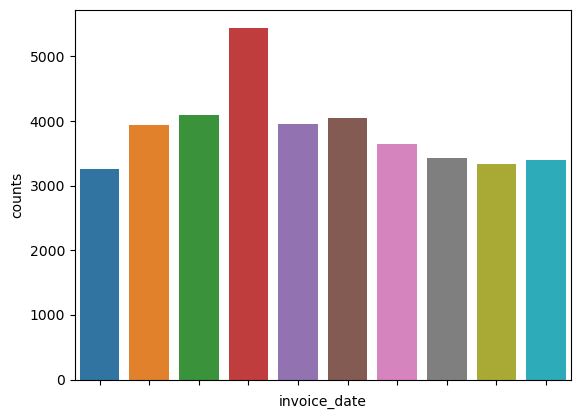

In [57]:
ax = sns.barplot(data=date_counts ,x='invoice_date', y='counts', order=date_counts.sort_values('invoice_date')['invoice_date'])
dates_to_show = ['2010-12-05', '2010-12-01', '2011-12-01']
ax.set_xticklabels([date if date in dates_to_show else '' for date in date_counts['invoice_date']])
plt.xticks(rotation=90)
plt.show()

## Bivariate Data Exploration

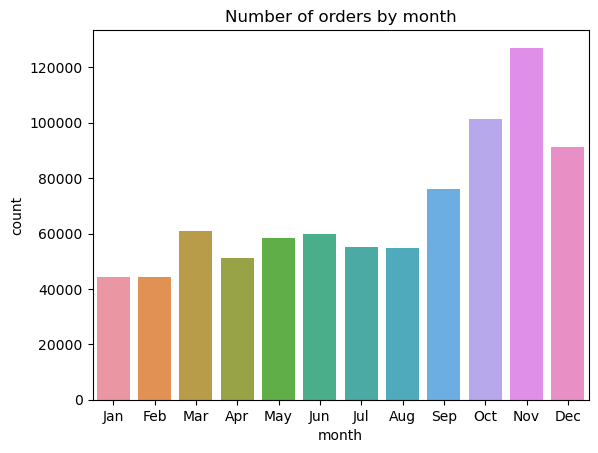

In [59]:
df['month'] = df['InvoiceDate'].dt.month

# count number of orders per month
order_counts = df.groupby('month').size().reset_index(name='count')

# create bar plot
ax = sns.barplot(x='month', y='count', data=order_counts)

# set x-axis labels to month names
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# set plot title
ax.set_title('Number of orders by month')

# show plot
plt.show()

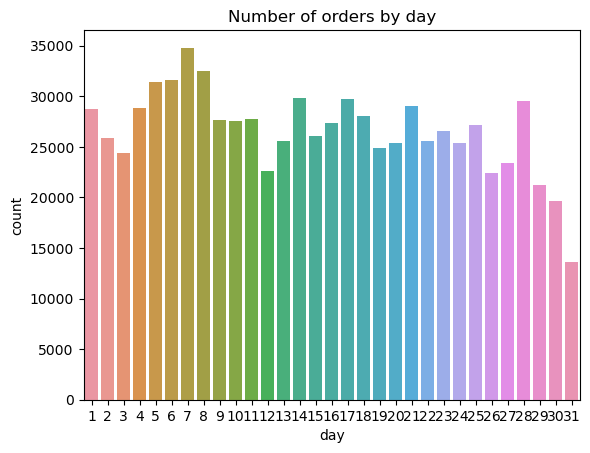

In [60]:
df['day'] = df['InvoiceDate'].dt.day

# count number of orders per month
order_counts = df.groupby('day').size().reset_index(name='count')

# create bar plot
ax = sns.barplot(x='day', y='count', data=order_counts)

# set x-axis labels to month names
# plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# set plot title
ax.set_title('Number of orders by day')

# show plot
plt.show()

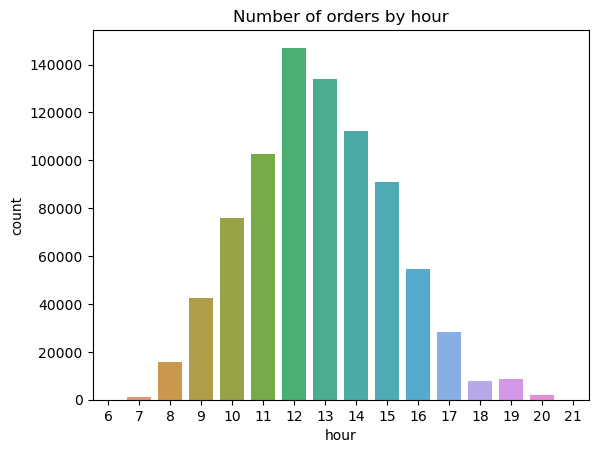

In [61]:
df['hour'] = df['InvoiceDate'].dt.hour

# count number of orders per month
order_counts = df.groupby('hour').size().reset_index(name='count')

# create bar plot
ax = sns.barplot(x='hour', y='count', data=order_counts)

# set x-axis labels to month names
# plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# set plot title
ax.set_title('Number of orders by hour')

# show plot
plt.show()

#### Invoice-Level amount

In [62]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'missing_cust_id', 'cancalled',
       'invoice_date', 'month', 'day', 'hour'],
      dtype='object')

In [63]:
df['amount'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date,month,day,hour,amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,False,False,2009-12-01,12,1,7,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,False,2009-12-01,12,1,7,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,False,2009-12-01,12,1,7,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,False,False,2009-12-01,12,1,7,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,False,False,2009-12-01,12,1,7,30.0


C:\Users\nguye\AppData\Local\Temp\ipykernel_12768\2781357254.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_amount = df[df['cancalled'] == False].groupby('Invoice').sum().reset_index()


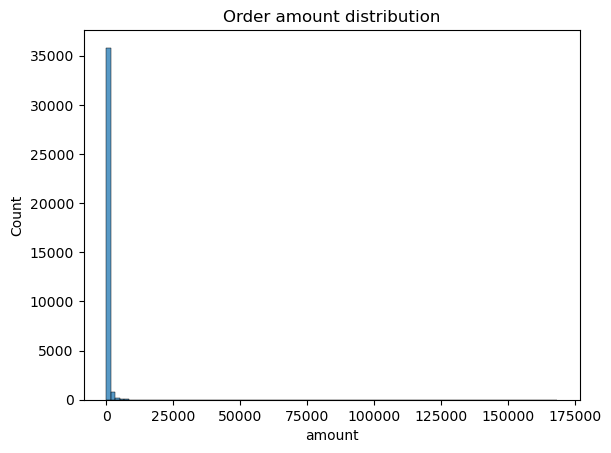

In [64]:
df['amount'] = df['Quantity'] * df['Price']

order_amount = df[df['cancalled'] == False].groupby('Invoice').sum().reset_index()

# create bar plot
ax = sns.histplot(x='amount', data=order_amount, bins=100)

# set plot title
ax.set_title('Order amount distribution')

# show plot
plt.show()

- Its hard to see any pattern in this plot because the distribution is highly skewed. So i want to remove outliers in order to see the "usual" pattern.

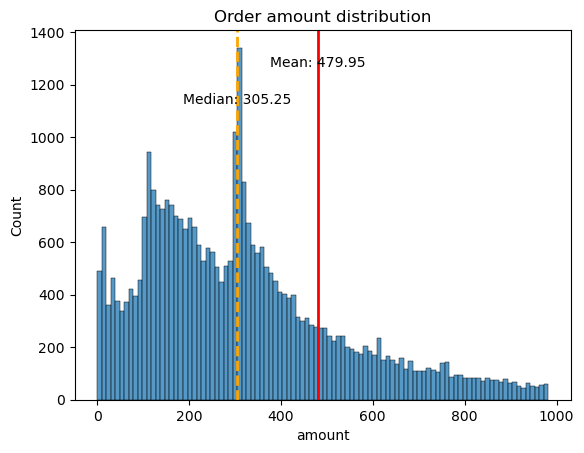

In [65]:
# calculate IQR
Q1 = order_amount['amount'].quantile(0.25)
Q3 = order_amount['amount'].quantile(0.75)
IQR = Q3 - Q1

# create boolean mask for non-outliers
mask = (order_amount['amount'] >= Q1 - 1.5 * IQR) & (order_amount['amount'] <= Q3 + 1.5 * IQR)

# remove outliers
order_amount_no_outliers = order_amount[mask]

# create hist plot
ax = sns.histplot(x='amount', data=order_amount_no_outliers, bins=100)

# plot mean and median line
mean = order_amount['amount'].mean()
median = order_amount['amount'].median()
ax.axvline(mean, color='red', lw=2)
ax.axvline(median, color='orange', ls='--', lw=2)

ax.text(mean, 0.9 * ax.get_ylim()[1], f'Mean: {mean:.2f}', ha='center')
ax.text(median, 0.8 * ax.get_ylim()[1], f'Median: {median:.2f}', ha='center')

# set plot title
ax.set_title('Order amount distribution')

# show plot
plt.show()

In [66]:
len(order_amount_no_outliers) / len(order_amount)

0.9224214882739593

- About 92.2% orders follow this distribution

#### Customer-Level amount

In [67]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,missing_cust_id,cancalled,invoice_date,month,day,hour,amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,False,False,2009-12-01,12,1,7,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,False,2009-12-01,12,1,7,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,False,False,2009-12-01,12,1,7,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,False,False,2009-12-01,12,1,7,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,False,False,2009-12-01,12,1,7,30.0


C:\Users\nguye\AppData\Local\Temp\ipykernel_12768\863910774.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_amount = df[df['cancalled'] == False].groupby('Customer ID').sum().reset_index()


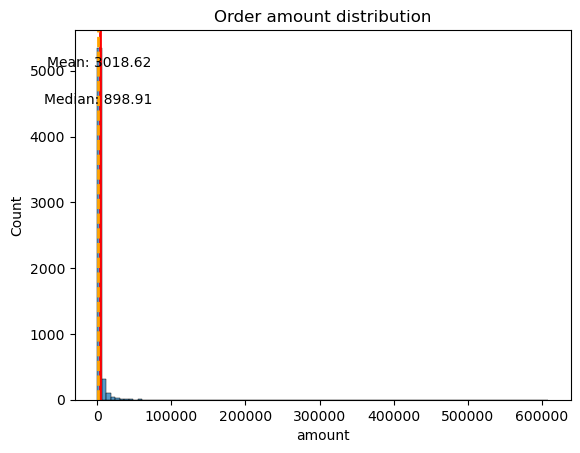

In [68]:
customer_amount = df[df['cancalled'] == False].groupby('Customer ID').sum().reset_index()

# create bar plot
ax = sns.histplot(x='amount', data=customer_amount, bins=100)

# set plot title
ax.set_title('Order amount distribution')

# plot mean and median line
mean = customer_amount['amount'].mean()
median = customer_amount['amount'].median()
ax.axvline(mean, color='red', lw=2)
ax.axvline(median, color='orange', ls='--', lw=2)

ax.text(mean, 0.9 * ax.get_ylim()[1], f'Mean: {mean:.2f}', ha='center')
ax.text(median, 0.8 * ax.get_ylim()[1], f'Median: {median:.2f}', ha='center')

# show plot
plt.show()

- Again the distribution is highly skewed so i will remove outliers to see the 'usual' pattern.

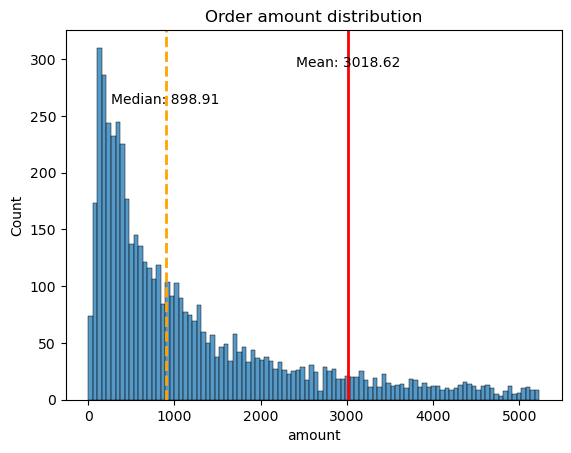

In [69]:
# calculate IQR
Q1 = customer_amount['amount'].quantile(0.25)
Q3 = customer_amount['amount'].quantile(0.75)
IQR = Q3 - Q1

# create boolean mask for non-outliers
mask = (customer_amount['amount'] >= Q1 - 1.5 * IQR) & (customer_amount['amount'] <= Q3 + 1.5 * IQR)

# remove outliers
customer_amount_no_outliers = customer_amount[mask]

# create hist plot
ax = sns.histplot(x='amount', data=customer_amount_no_outliers, bins=100)

# plot mean and median line
mean = customer_amount['amount'].mean()
median = customer_amount['amount'].median()
ax.axvline(mean, color='red', lw=2)
ax.axvline(median, color='orange', ls='--', lw=2)

ax.text(mean, 0.9 * ax.get_ylim()[1], f'Mean: {mean:.2f}', ha='center')
ax.text(median, 0.8 * ax.get_ylim()[1], f'Median: {median:.2f}', ha='center')

# set plot title
ax.set_title('Order amount distribution')

# show plot
plt.show()

- On average, each customer spent 3018.62
- Half of them spent less than 898.91
- This plot showing that some high-value customers bring big part of the revenue